<h1>Big Data & Data Analytics Project on Job Change Prediction using Python</h1>
<p>By  Aakriti Pathania(035001),Prachi Dua(035040),Prachi Goel(035041) </p>
<h2>Introduction</h2>
<p>In this project we tried to explore and visualize the job change prediction dataset using python to test and train our machine leanring model.</p>
<h2>Objectives of the Project:</h2>
<p>1. Exploration & Visualizion the data <br>2. To examine if data has any structure<br>3. To do the Feature Engineering of data<br>4. To create the Data Pipelining<br>5. Perform the Hyperparameter tuning</p>
<h2>About Dataset</h2>
<p>An Ed-Tech company wants to hire data scientists among people who have successfully passed some courses and then signed up for training. The company wants to know which of the people are looking for a job change and will prefer working with them after completion of training because it helps to reduce the cost and time for categorization of candidates.

Information related to demographics, education, the experience is in hands from candidates sign up and enrollment.</p>


# This dataset is composed by the following variables:

**enrollee_id:** Unique ID for the candidate

**city:** City code

**city_ development _index:** Development index of the city (scaled)

**gender:** Gender of the candidate

**relevent_experience:** Relevant experience of the candidate

**enrolled_university:** Type of University course enrolled if any

**education_level:** Education level of candidate

**major_discipline:** Education major discipline of the candidate

**experience:** Candidate total experience in years

**company_size:** No of employees in current employer's company

**company_type:** Type of current employer

**lastnewjob:** Difference in years between previous job and current job

**training_hours:** training hours completed

**target:** 0 – Not looking for a job change, 1 – Looking for a job change

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
# 0.0
# For skopt routines
! pip install scikit-optimize

# 0.1 For plotting skopt results
! pip install scikit-optimize[plots]
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error

In [2]:
# 1.1 Data manipulation and plotting modules
import numpy as np
import pandas as pd


# 1.2 Data pre-processing
#     z = (x-mean)/stdev
from sklearn.preprocessing import StandardScaler as ss

# 1.3 Dimensionality reduction and noise removal
from sklearn.decomposition import PCA

# 1.4 Data splitting and model parameter search
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# 1.5 Model pipelining
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# 1.6 Hyperparameter optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# 1.7.1
#     pip install scikit-optimize
#     pip install 'scikit-optimize[plots]'
#     Refer: https://github.com/scikit-optimize/scikit-optimize
#     conda install -c conda-forge scikit-optimize
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

# 1.8 Modeling modules
#     Call sklearn wrapper of xgboost
# """Scikit-Learn Wrapper interface for XGBoost."""
#  """Implementation of the Scikit-Learn API for XGBoost.
# https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn
# Stackoverflow:
# https://stackoverflow.com/a/34696477
# https://stackoverflow.com/a/46947191
# Install as: conda install -c anaconda py-xgboost
from xgboost.sklearn import XGBClassifier

In [3]:
# 1.9 Model evaluation metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix

# 1.10
import matplotlib.pyplot as plt
import seaborn as sns


# 1.11 Permutation feature importance
from sklearn.inspection import permutation_importance

In [4]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

Some basic libraries ...

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
data = pd.read_csv(r"C:\Users\ADMIN\Desktop\Python\BDDA\Project 1\aug_train.csv")
test = pd.read_csv(r"C:\Users\ADMIN\Desktop\Python\BDDA\Project 1\aug_test.csv")

In [7]:
print('Job prediction dataset shape:  ', data.shape)
data.head()

Job prediction dataset shape:   (19158, 14)


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [8]:
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


## Dataset Variable information:

+ enrollee_id : Unique ID for enrollee
+ city: City code
+ citydevelopmentindex: Developement index of the city (scaled)
+ gender: Gender of enrolee
+ relevent_experience: Relevent experience of enrolee
+ enrolled_university: Type of University course enrolled if any
+ education_level: Education level of enrolee
+ major_discipline :Education major discipline of enrolee
+ experience: Enrolee total experience in years
+ company_size: No of employees in current employer's company
+ company_type : Type of current employer
+ lastnewjob: Difference in years between previous job and current job
+ training_hours: training hours completed
+ target: 0 – Not looking for job change, 1 – Looking for a job change

checking the type of the data types

In [9]:
data.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

**"Categorical variables"**

We need to deal with categorical variables so columns which have values different than numbers. 

A simple way of selecting all categorical columns is by checking their type.

Thus, In the database, only 4 columns are of numerical-data, and up to 10 columns are Categorical variables type.

In [10]:
np.array(data.columns[data.dtypes != object])

array(['enrollee_id', 'city_development_index', 'training_hours',
       'target'], dtype=object)

## VISUALIZATIONS

<AxesSubplot:xlabel='target', ylabel='count'>

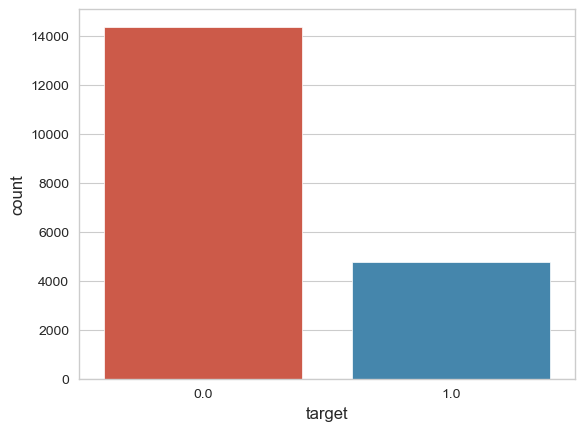

In [26]:
# 14000 people are not looking for a job change and on the other hand approximately 5000 people are willing to change their jobs.
#Churn vs. normal 
sns.countplot(data.target)

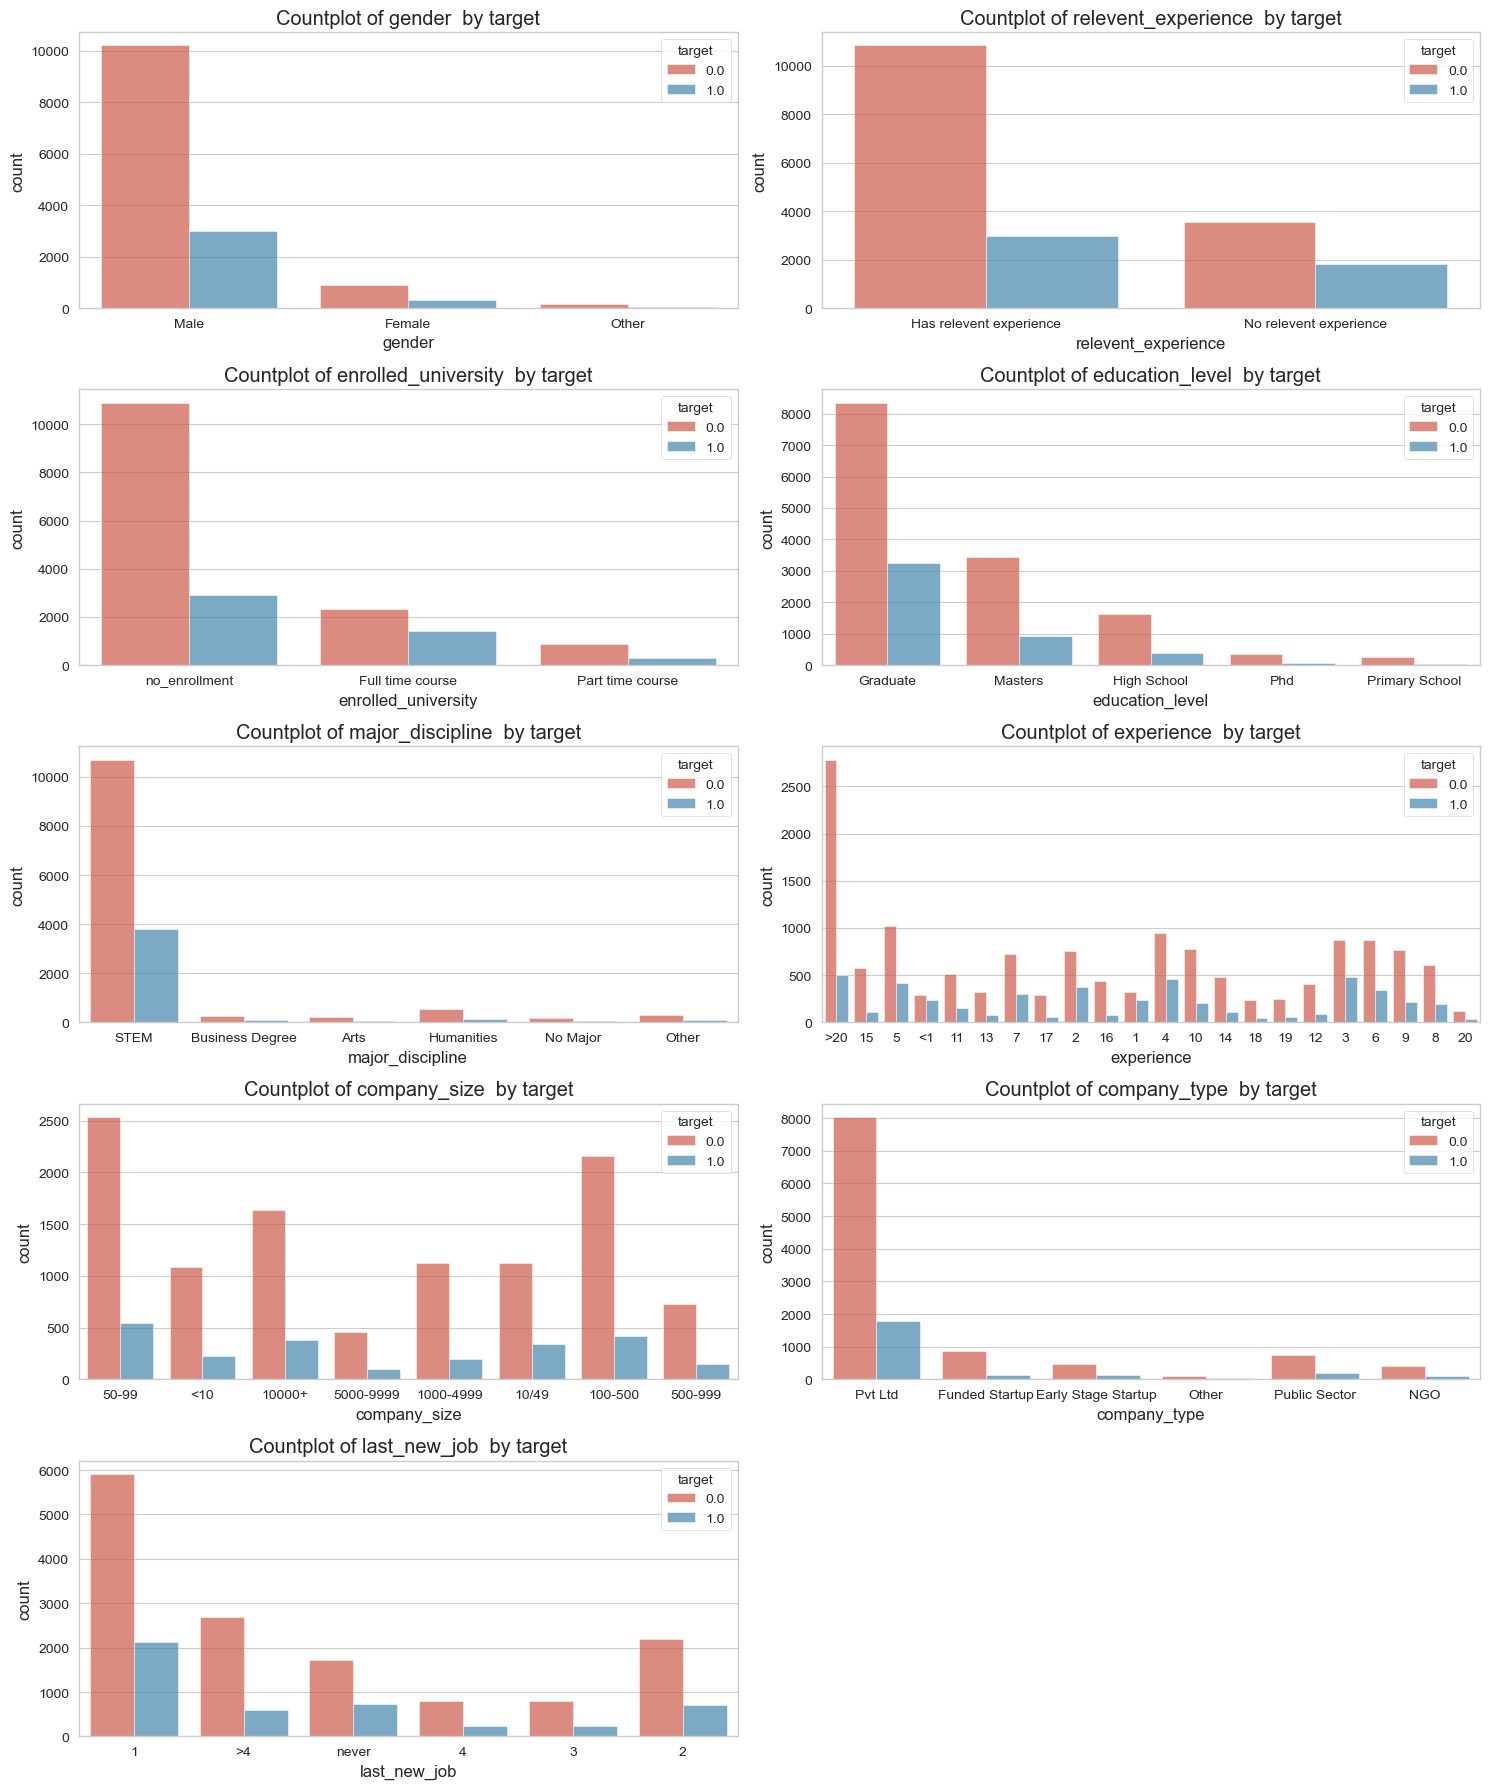

In [27]:
#Frequency of each category separated by label
plt.figure(figsize=[15,18])
features = ['gender','relevent_experience','enrolled_university','education_level', 'major_discipline',
       'experience','company_size','company_type','last_new_job']
n=1
for f in features:
    plt.subplot(5,2,n)
    sns.countplot(x=f, hue='target', alpha=0.7, data=data)
    plt.title("Countplot of {}  by target".format(f))
    n=n+1
plt.tight_layout()
plt.show()

From these histogram charts, it can be seen, there is no special correlation between the variables with the target function to distinguish the value of the target. Furthermore, categorical variables cannot determine the correlation factor between these variables and the target function.

### DATA PREPROCESSING

In [11]:
import copy
df_train=copy.deepcopy(data) #copy of the entire data along with all its internal structures and data is created
df_test=copy.deepcopy(test)  #copy of the entire test along with all its internal structures and data is created

cols=np.array(data.columns[data.dtypes != object])
for i in df_train.columns:
    if i not in cols:
        df_train[i]=df_train[i].map(str)
        df_test[i]=df_test[i].map(str)
df_train.drop(columns=cols,inplace=True)
df_test.drop(columns=np.delete(cols,len(cols)-1),inplace=True)

#### Data Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

# build dictionary function
cols=np.array(data.columns[data.dtypes != object]) #converts the filtered column names into a NumPy array and assigns it to the variable cols
d = defaultdict(LabelEncoder) 

# only for categorical columns apply dictionary by calling fit_transform 
df_train = df_train.apply(lambda x: d[x.name].fit_transform(x))
df_test=df_test.apply(lambda x: d[x.name].transform(x))
df_train[cols]=data[cols]
df_test[np.delete(cols,len(cols)-1)]=test[np.delete(cols,len(cols)-1)]

In [13]:
df_train.dtypes

city                        int32
gender                      int32
relevent_experience         int32
enrolled_university         int32
education_level             int32
major_discipline            int32
experience                  int32
company_size                int32
company_type                int32
last_new_job                int32
enrollee_id                 int64
city_development_index    float64
training_hours              int64
target                    float64
dtype: object

#### Finding the missing values

In [14]:
df_train.isnull().sum()

city                      0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
enrollee_id               0
city_development_index    0
training_hours            0
target                    0
dtype: int64

Text(0.5, 1.0, 'Heatmap of all the Features of Train data set')

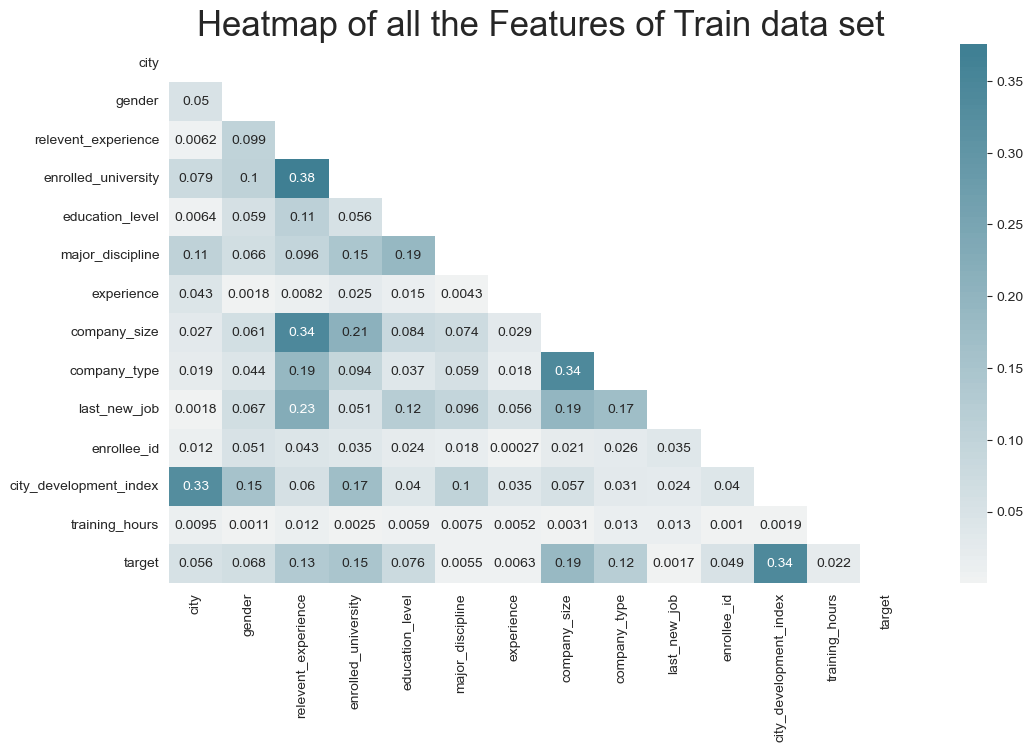

In [15]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (12,7))
## Plotting heatmap. # Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df_train.corr().apply(abs), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_train.corr().apply(abs), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, )
plt.title("Heatmap of all the Features of Train data set", fontsize = 25)

From the above heatmap we can clearly observe that the target has a high dependance on the city_development_index which means candidates from city with higher amount of development index tends to move towards the field of data science.

In [16]:
columns_to_drop = ['enrollee_id','major_discipline']
df=data.drop(columns=columns_to_drop)
df


,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,>20,NaN,NaN,1,36,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,15,50-99,Pvt Ltd,>4,47,0.0
2,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,5,NaN,NaN,never,83,0.0
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,<1,NaN,Pvt Ltd,never,52,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,14,NaN,NaN,1,42,1.0
19154,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,14,NaN,NaN,4,52,1.0
19155,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,>20,50-99,Pvt Ltd,4,44,0.0
19156,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,<1,500-999,Pvt Ltd,2,97,0.0


In [17]:
df_train.shape

(19158, 14)

In [18]:
df_2 = df_train.copy()

#### Dividing the data into test and train data

In [19]:
X = df_2.drop(["target"], axis=1)
y = df_2[["target"]]

In [20]:
# Dividing data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [21]:
X.isna().sum()
y.isna().sum()

target    0
dtype: int64

#### Creating Pipeline


In [22]:
steps_rr = [
    ('scaler', StandardScaler()),            # Step 1: StandardScaler
    ('regressor', RandomForestRegressor())  # Step 2: RandomForestRegressor
]

In [23]:
pipe_rr = Pipeline(steps_rr)

In [43]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {

'n_estimators' : [50, 100, 500],
'max_features' : ['auto','sqrt', 'log2'],
'max_depth' : [5,8,10,None],
'min_samples_split' : [3,5,7,9]
#    'n_estimators': [100, 200],
#    'max_depth': [None, 10, 20],
#    'min_samples_split': [2, 5],
#    'min_samples_leaf': [1, 2,4]
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=40),
    param_distributions=param_distributions,
    scoring='roc_auc',  # Choose an appropriate scoring metric
    cv=5,                # Number of cross-validation folds
    n_jobs=-1,           # Use all available CPU cores
    verbose=1,
)

In [44]:
# Start fitting pipeline to data
import time
print("\n\n--Takes time...---\n")
start = time.time()
# Fit the RandomizedSearchCV object to your training data
random_search.fit(X_train, y_train)
end = time.time()
print()
(end - start)/60    




--Takes time...---

Fitting 5 folds for each of 10 candidates, totalling 50 fits



1.0652282555898032

In [45]:
# Access the best hyperparameters and the corresponding score
# 7.3
f"Best score: {random_search.best_score_} "            # 'Best score: 0.8013939779897064  

'Best score: 0.8026411103603344 '

Interpretation : An ROC AUC score in this range indicates that the model is performing better than random guessing, but there might be room for improvement. This is an average measure of the model.

These results indicate that the random search has identified a set of hyperparameters for RandomForestRegressor that achieved the best performance of the data based on the chosen ROC AUC scoring metric.

In [46]:
# 7.3.1
print()
f"Best parameter set {random_search.best_params_}"

"Best parameter set {'n_estimators': 100, 'min_samples_split': 7, 'max_features': 'auto', 'max_depth': 8}"

In [47]:
# 7.4. Make predictions using the best returned model
y_pred = random_search.predict(X_valid)
print("--Few predictions--\n")
y_pred[:4]

--Few predictions--



array([0.08817753, 0.08688186, 0.07333284, 0.05936641])

In [48]:
from sklearn.metrics import roc_auc_score

y_pred = random_search.predict(X_valid)  # Assuming 'random_search' is your trained regressor
roc_auc = roc_auc_score(y_valid, y_pred)
print(f"ROC_AUC: {roc_auc}")
y_pred = random_search.predict(X_valid)  # Assuming 'random_search' is your trained regressor

ROC_AUC: 0.7935762810913475


Interpretation : An ROC AUC score in this range indicates that the model is performing better than random guessing, but there might be room for improvement. This is an average measure of the model.

In [38]:
# Assuming 'randomsearch' is your trained GridSearchCV object and 'best_rf_model' is the best RandomForestRegressor model
best_rf_model = random_search.best_estimator_

# Access feature importances
feature_importances = best_rf_model.feature_importances_

# Print the number of features and the feature importances
print("Number of features:", feature_importances.shape[0])
print("Feature importances:", feature_importances)   

Number of features: 13
Feature importances: [0.04513984 0.01323759 0.01584416 0.01844922 0.05083441 0.02443339
 0.0512136  0.17569014 0.02059142 0.0363061  0.09885479 0.37023441
 0.07917093]


In [39]:
colnames = X.columns.tolist()
imp_values = feature_importances
df_imp = pd.DataFrame(data=imp_values, 
                     index = colnames,
                     columns =["imp"]).sort_values(by ='imp')
df_imp

,imp
gender,0.013238
relevent_experience,0.015844
enrolled_university,0.018449
company_type,0.020591
major_discipline,0.024433
last_new_job,0.036306
city,0.045140
education_level,0.050834
experience,0.051214
training_hours,0.079171


In [40]:
# 7.11 First five columns with least feature importance are:
list(df_imp.index.values[:5])

['gender',
 'relevent_experience',
 'enrolled_university',
 'company_type',
 'major_discipline']